<a href="https://colab.research.google.com/github/Faabry/Data_Analysis/blob/main/DSA_RH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> <b> Análise de dados de RH </b> </h1>
<p> A equipe de RH precisa encontrar candidados com grande potencial para fazer parte da empresa.</p>
<p> A partir de uma base de dados identifique os indicadores e verifique se existem correlações entre os dados para que a esquipe de RH possa fazer as contratações adequadas.</p>


In [1]:
# Verificando a versão Python
from platform import python_version as py_vers
print(f"Versão Python para esse projeto : {py_vers()}")

Versão Python para esse projeto : 3.9.16


In [2]:
# Para atualizar um pacote use o parâmetro -U

In [3]:
!pip install -q -U watermark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.4 MB/s eta 0:00:00


In [4]:
!pip install -q -U missingno

In [5]:
!pip install -q -U category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 7.4 MB/s eta 0:00:00


In [6]:
!pip install -q plotly

In [7]:
# Imports

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

# Estatística
import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Engenharia e atributos 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Ignore Warnings
import sys
import warnings
if not sys.warnoptions:
  warnings.simplifier("ignore")


In [8]:
%reload_ext watermark
%watermark -a "Airton Fabre" --iversions

Author: Airton Fabre

numpy     : 1.22.4
scipy     : 1.10.1
sys       : 3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]
pandas    : 1.4.4
matplotlib: 3.7.1
missingno : 0.5.2
plotly    : 5.13.1
seaborn   : 0.12.2



In [9]:
# Carregando o dataset
df = pd.read_csv("aug_train.csv")

In [10]:
df.shape

(19158, 14)

In [11]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [12]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

<h1> <b> Análise Exploratória dos dados </b> </h1>

In [14]:
# Descrevendo os dados não numéricos
df.describe(include = object)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [15]:
df.describe().drop(columns= ["enrollee_id", "target"])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


<p> Em <b>city_development_index(CDI)</b> os valores média são 0.828, mediana 0.903 e std 0.123 oque significa que a maioria dos candidatos vieram de cidades bem desenvolvidas.
<p>PS: Quanto menor o desvio padrão menor é a dispersão dos dados.<p>
<br>
<p> Em <b>training_hours</b> os valores média são 65.36, mediana 47.00 e max 336.00 oque significa que tem mais candidatos com poucas horas de treinamento.

In [16]:
list(df.columns.values)[3:12]

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

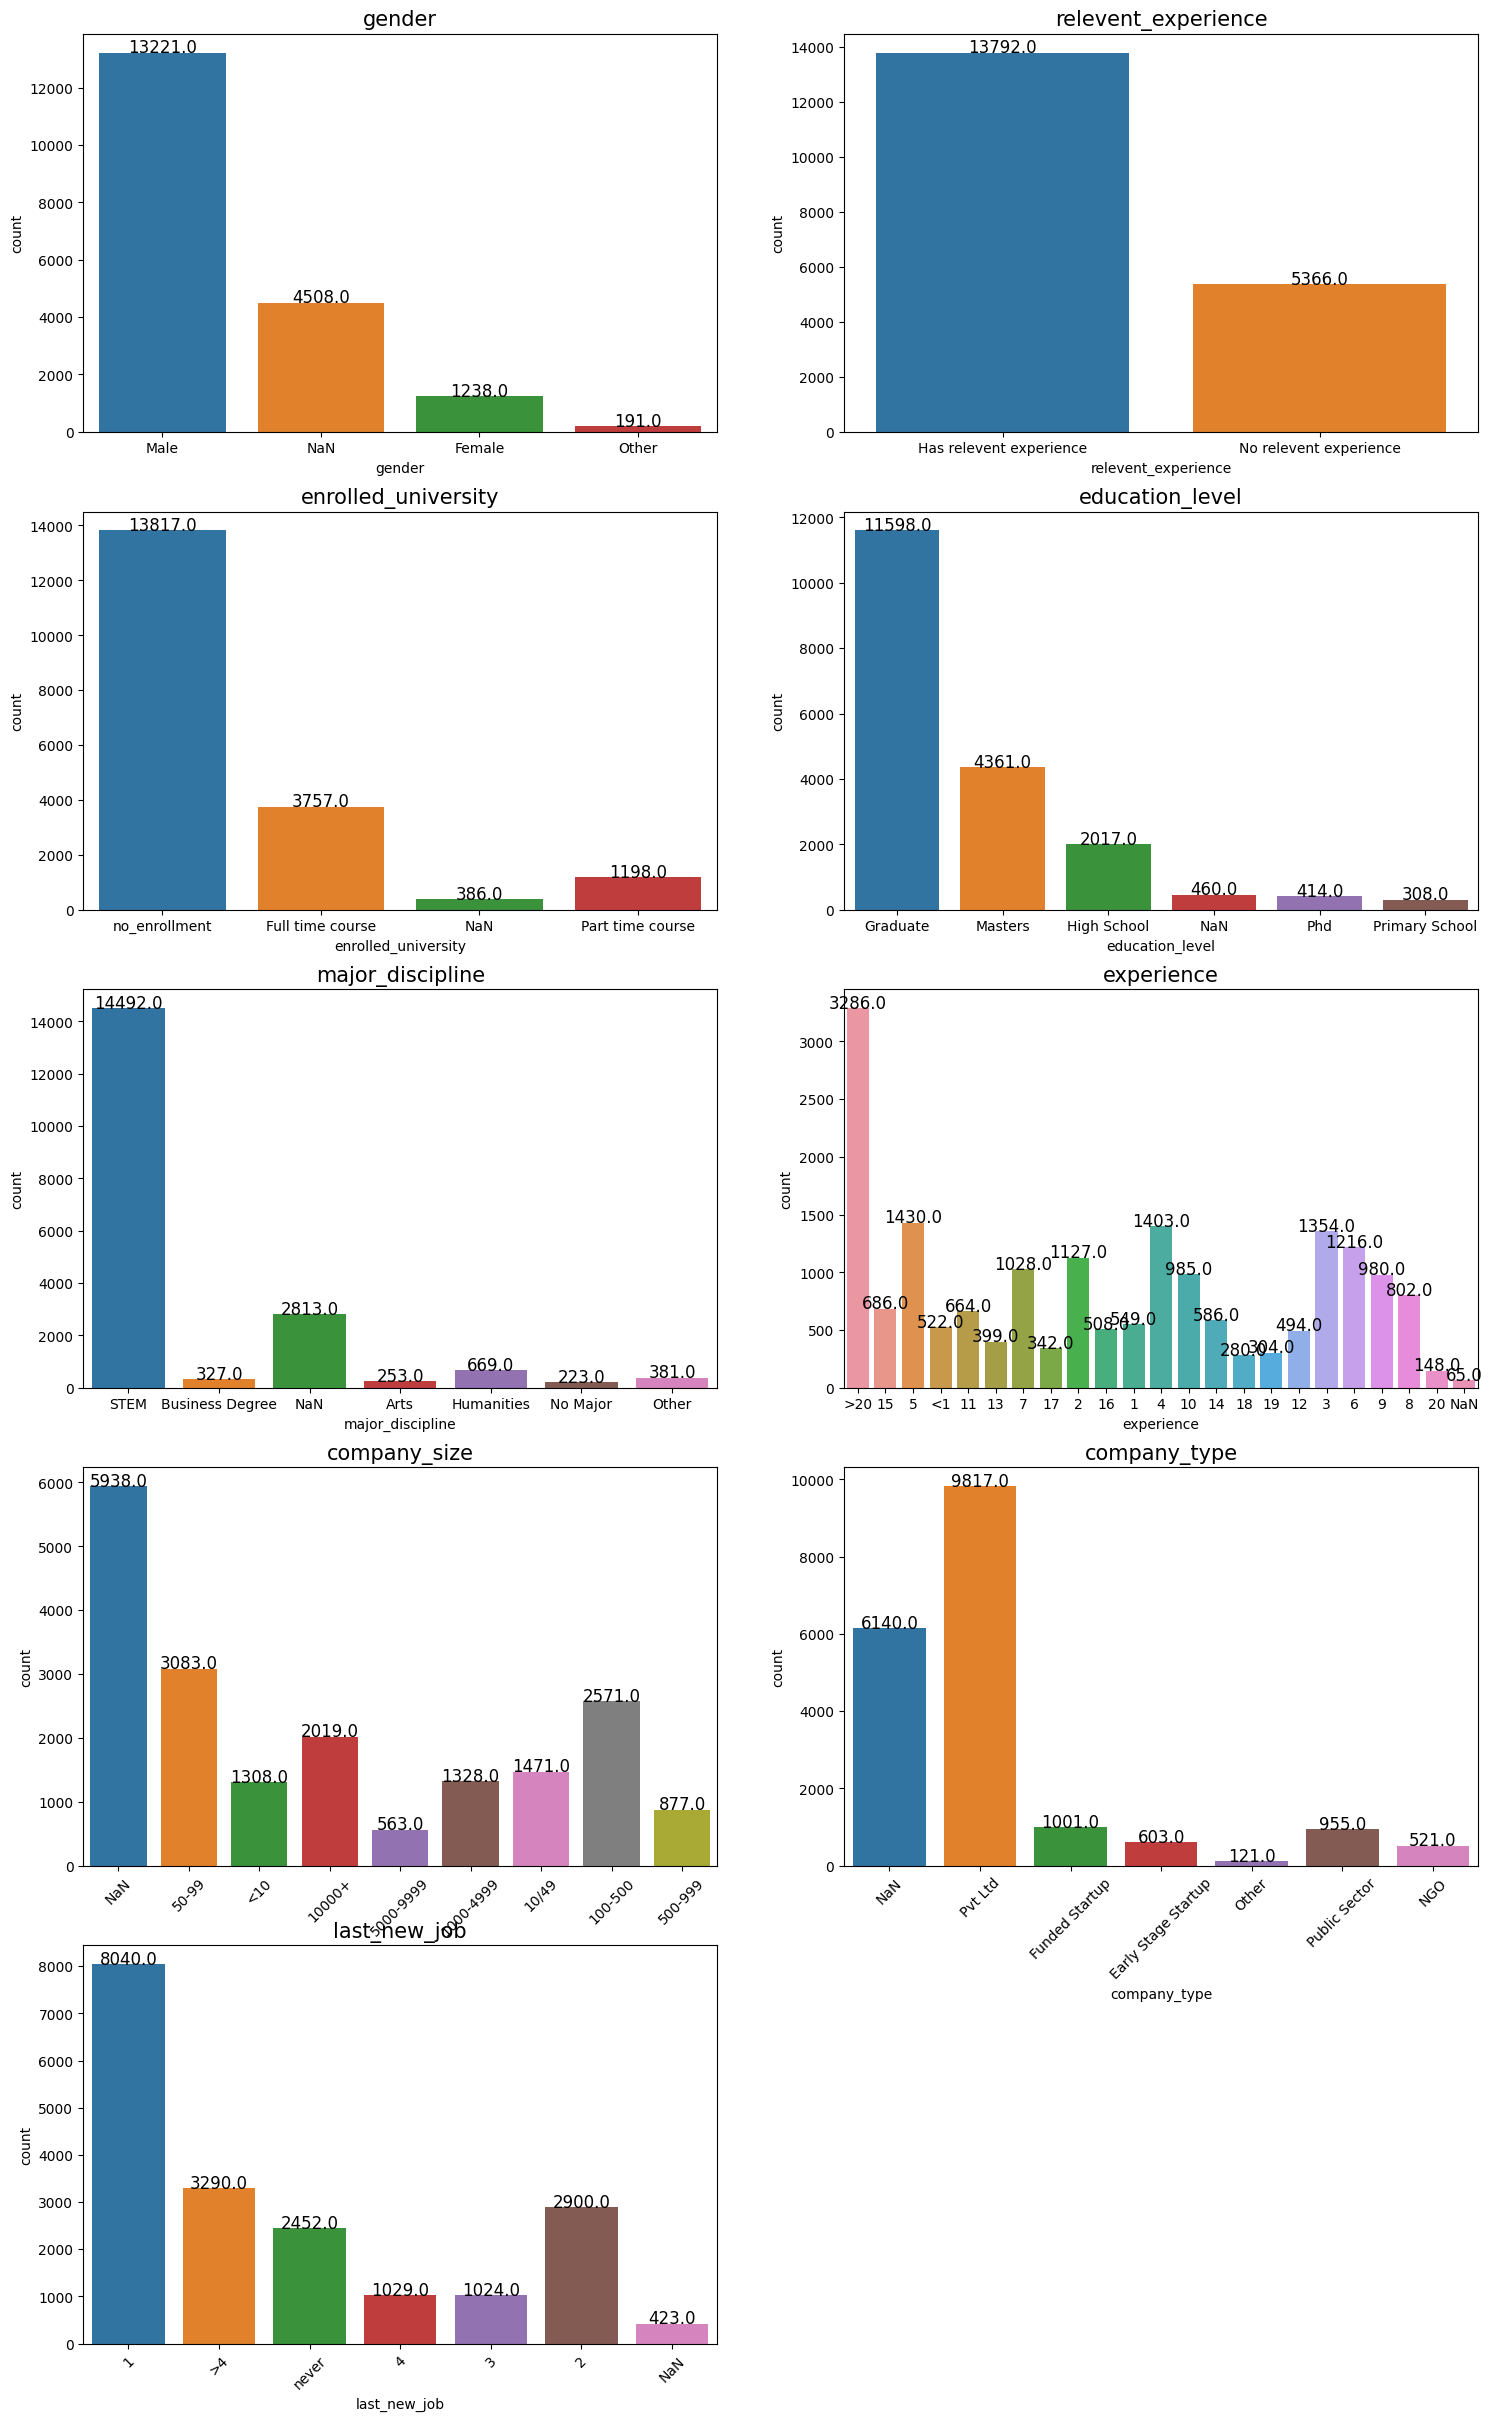

In [17]:
plt.figure(figsize=(18, 30))

columns_list = list(df.columns.values)[3:12]

# contador
a = 0

for i in columns_list:
  a += 1
  plt.subplot(5, 2, a)
  ax = sns.countplot(data = df.fillna("NaN"), x = i) #i é o nome da coluna
  plt.title(i, fontsize = 15) 
  for p in ax.patches:
    ax.annotate(f"\n{p.get_height()}", (p.get_x() + 0.4, p.get_height()),
                ha="center", color="black", size=12)
    if a >= 7:
      plt.xticks(rotation = 45)

plt.show()

<h1> <b>Verificando a Distribuição da Variáveis Numéricas</b> </h1>

In [18]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [19]:
# As variaveis "enrolled_id" e "target" não necesariamente são numéricas
# Portanto, vamos exclui-las
df.describe().drop(columns= ["enrollee_id", "target"])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


<p> Como podemos observar o valor da <b>média</b> é um tanto quanto maior em relação ao valor <b>mediano</b>, provavelmente existem valores <b>outliers</b> que estão afetando o valor da média, vamos verificar mais afundo utilizando gráficos.

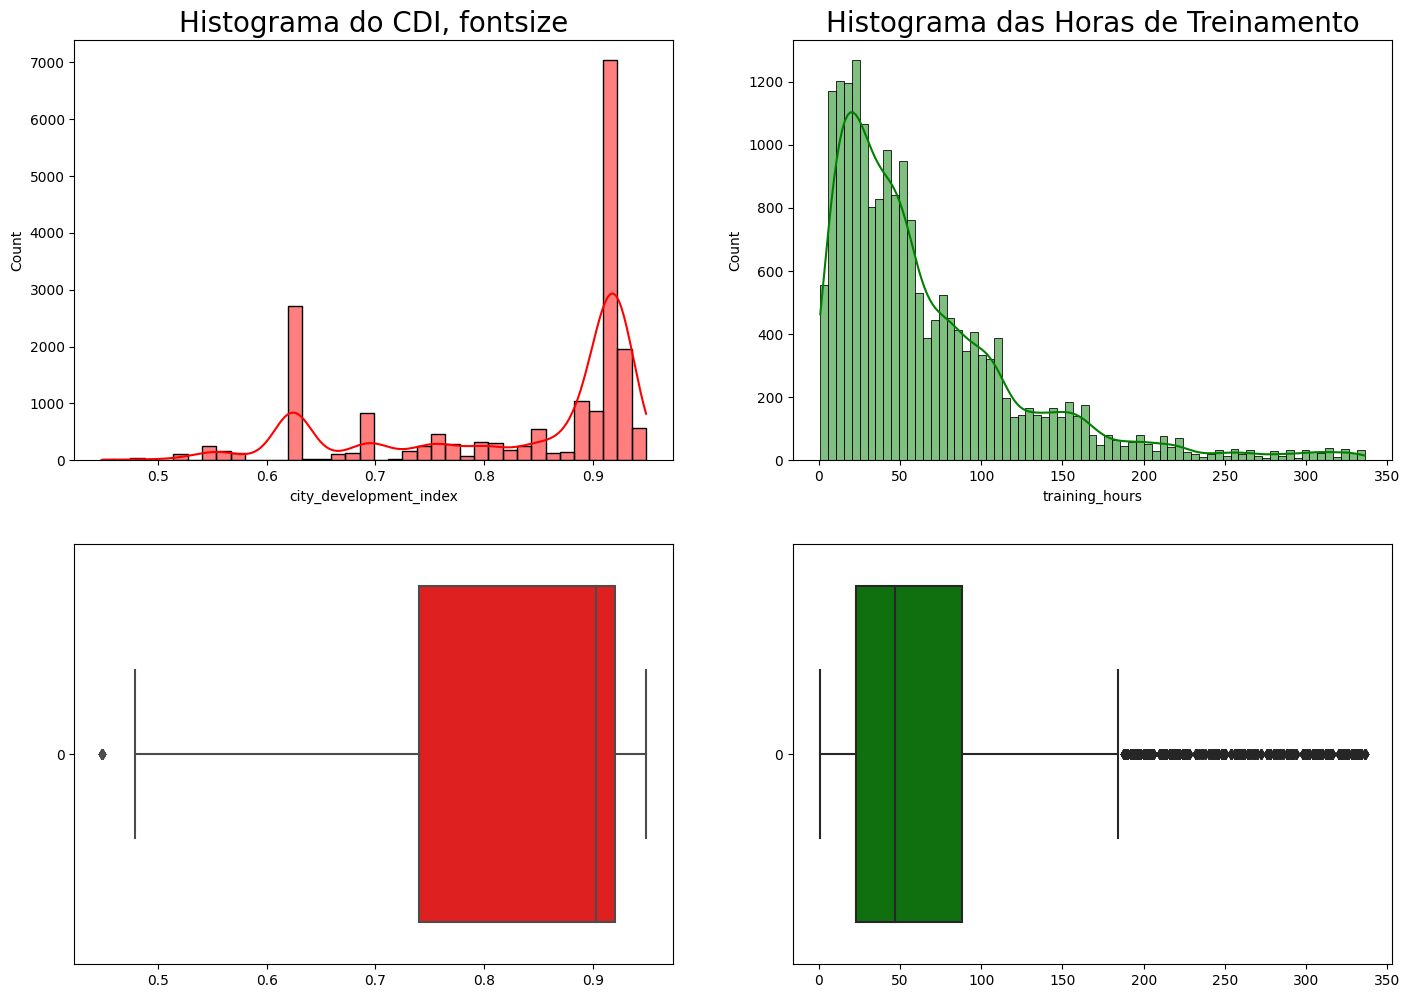

In [20]:
plt.figure(figsize = (17, 12))

# Subplots com histogramas
plt.subplot(221)
sns.color_palette("hls", 8) # paleta de cores do histograma

sns.histplot(df["city_development_index"], kde = True, color = "red") #KDE é a curva de densidade
plt.title("Histograma do CDI, fontsize", fontsize = 20)

plt.subplot(222)
sns.histplot(df["training_hours"], kde = True , color = "green")
plt.title("Histograma das Horas de Treinamento", fontsize = 20)


# Subplots com boxplots
plt.subplot(223)
sns.boxplot(df["city_development_index"], color = "red", orient="h")

plt.subplot(224)
sns.boxplot(df["training_hours"], color = "green", orient="h")

plt.show()

<p> Em primeiro momento realmente existem valores outliers, mas que não são tão absurdos, vamos <b>validar</b> se nossa distribuição é ou não normal, realizando o teste de normalidade. </p>

<h1> <b> Interpretação de um Boxplot </b> </h1>
<p> O boxplot consiste em um retângulo que representa a interquartil (IQR) do conjunto de dados, ou seja, a diferença entre o primeiro quartil (25%) e o terceiro quartil (75%). Dentro do retângulo, é desenhada uma linha que representa a mediana (50%). As "whiskers" (pontas de linha) que saem do retângulo representam os valores mínimo e máximo do conjunto de dados, excluindo os outliers (valores muito distantes do restante do conjunto).

Outliers são representados por pontos individuais e são calculados como valores que ficam acima do terceiro quartil acrescido de 1,5 vezes o IQR ou abaixo do primeiro quartil subtraído de 1,5 vezes o IQR.

O gráfico boxplot é útil para identificar a presença de valores discrepantes e para comparar distribuições de diferentes grupos ou variáveis. Ele também permite visualizar a simetria ou assimetria da distribuição, bem como a dispersão dos dados.</p>

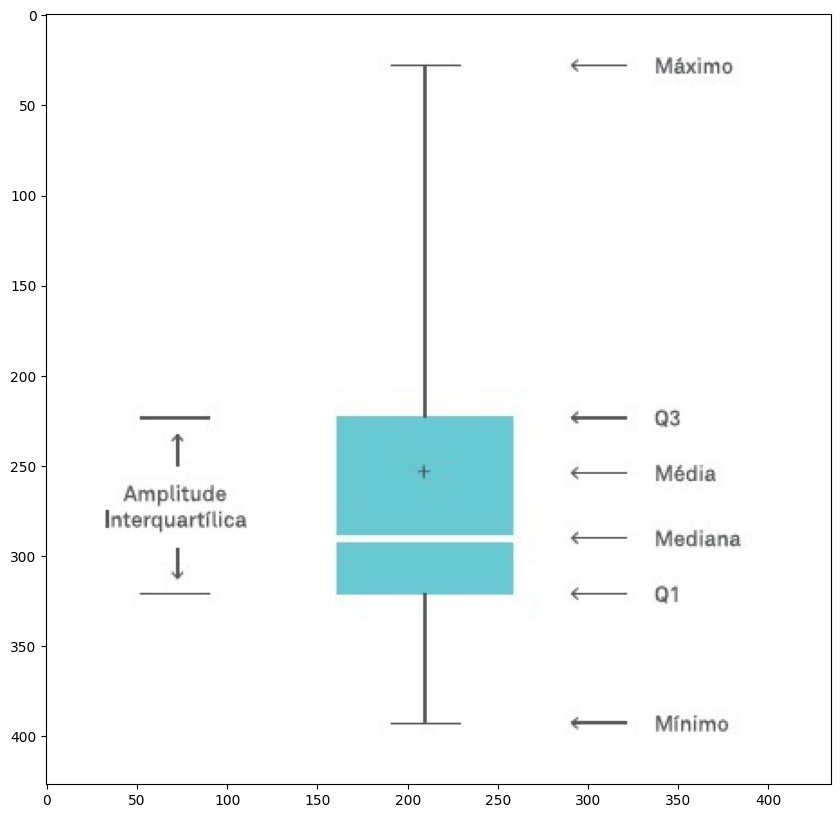

In [21]:
from PIL import Image

img = Image.open("boxplot.jpg")
plt.figure(figsize = (12, 10))
plt.imshow(img)
plt.show()

<p> Em estatística, a distribuição normal, também conhecida como distribuição gaussiana, é uma das mais importantes e amplamente utilizadas distribuições estatísticas. Ela é caracterizada por uma curva de sino simétrica em torno da média, com grande parte dos dados concentrados na região próxima à média e diminuindo gradualmente em direção às extremidades.

A distribuição normal é descrita por dois parâmetros: a média (μ) e o desvio padrão (σ). A média é o ponto central da distribuição e indica o valor mais provável do conjunto de dados. O desvio padrão indica a dispersão dos dados em relação à média.

A distribuição normal é importante em estatística porque muitos fenômenos naturais e sociais possuem distribuições que se aproximam da normalidade, como por exemplo o peso das pessoas, a altura das árvores, o desempenho em testes padronizados, entre outros. Além disso, a distribuição normal possui algumas propriedades matemáticas que a tornam especialmente útil em inferência estatística e modelagem de dados.</p>

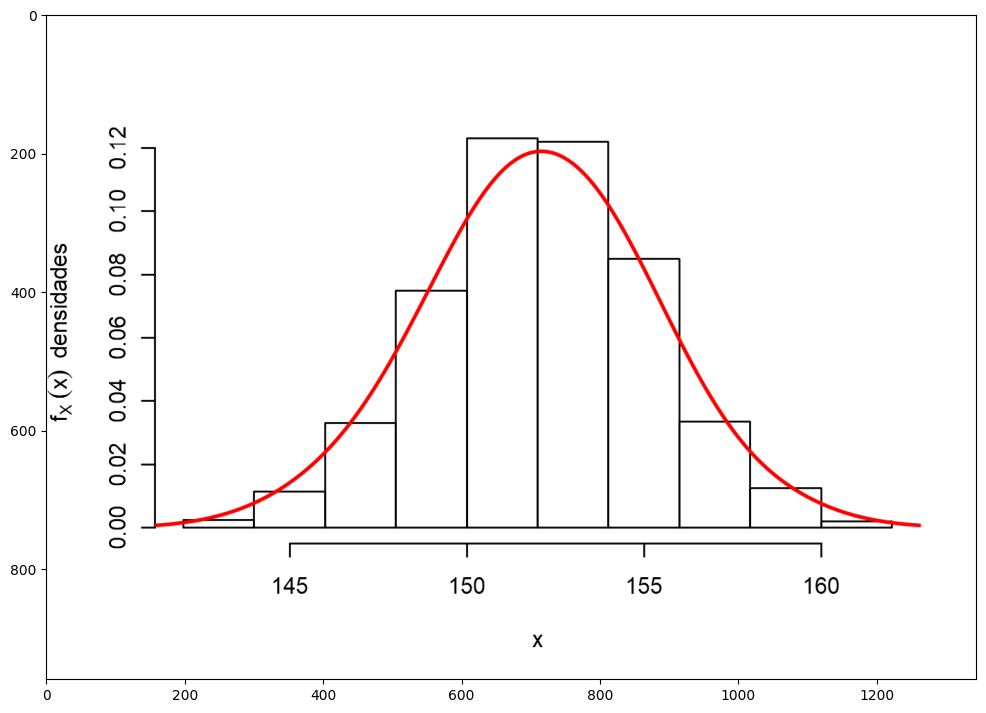

In [22]:
img = Image.open("normal.png")
plt.figure(figsize = (12, 10))
plt.imshow(img)

plt.show()

<h1> <b> Validando a distribuição das variáveis numéricas</b> </h1>
<ul>
  <li>PS: O teste de normalidade só pode ser feito em variáveis </li>numéricas </ul>


In [23]:
# Coletando os dados das variáveis numéricas
numerical_feature = ["city_development_index", "training_hours"]

for i in numerical_feature:
  # normaltest (importado da biblioteca "scipy")
	stats, pval = normaltest(df[i])

  # Valor 0.05 é uma convessão mundial para validar a normalidade de uma variável
	if pval > 0.05:
		print(i, ": Distribuição Normal")
	else:
		print(i, ": Distribuição Não Normal")


city_development_index : Distribuição Não Normal
training_hours : Distribuição Não Normal


<h1><b>Conclusão:</b></h1>
<ul>
  <li> As variáveis <b>city_development_index</b>e<b>training_hours</b> não seguem uma distribuição normal, portanto vamos aplicar o método <b>não paramétrico.</b> Caso as variáveis tivessem uma distribuição normal usariamos o método paramétrico.</li>
<br>
  <li> Dados de <b>training_hours</b> estão localizados principalmente no lado esquerdo do histograma. É um comportamento esperado
porque as pessoas tendem a ficar bastante animadas ao iniciar um treinamento, mas nem todas conseguem terminar uma maratona.</li>
</ul>


<h1><b>Correlação dos dados</b></h1>
<h3><b>Correlação de Spearman Entre Variáveis Numéricas</b></h3>


In [24]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [25]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [26]:
df_numeric = df.copy()

In [27]:
df_numeric["experience"].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [28]:
df_numeric["experience"].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [29]:
df_numeric["experience"] = np.where(df_numeric["experience"] == "<1", 1, df_numeric["experience"])
df_numeric["experience"] = np.where(df_numeric["experience"] == ">20", 21, df_numeric["experience"])
df_numeric["experience"] = df_numeric["experience"].astype(float)

In [30]:
df_numeric["last_new_job"].unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [31]:
df_numeric["last_new_job"] = np.where(df_numeric["last_new_job"] == ">4", 5, df_numeric["last_new_job"])
df_numeric["last_new_job"] = np.where(df_numeric["last_new_job"] == "never", 0, df_numeric["last_new_job"])
df_numeric["last_new_job"] = df_numeric["last_new_job"].astype(float)

In [32]:
df_numeric["last_new_job"].value_counts()

1.0    8040
5.0    3290
2.0    2900
0.0    2452
4.0    1029
3.0    1024
Name: last_new_job, dtype: int64

In [33]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  float64
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(4), int64(2), object(8)
mem

In [34]:
# as duas formas são aceitas pelo pandas

df_numeric.drop(["enrollee_id"], axis=1).corr("spearman")
# df_numeric.drop("enrollee_id", axis=1).corr("spearman")

,city_development_index,experience,last_new_job,training_hours,target
city_development_index,1.000000,0.300997,0.182698,0.007491,-0.279165
experience,0.300997,1.000000,0.473284,0.003569,-0.183721
last_new_job,0.182698,0.473284,1.000000,0.002959,-0.082045
training_hours,0.007491,0.003569,0.002959,1.000000,-0.014126
target,-0.279165,-0.183721,-0.082045,-0.014126,1.000000


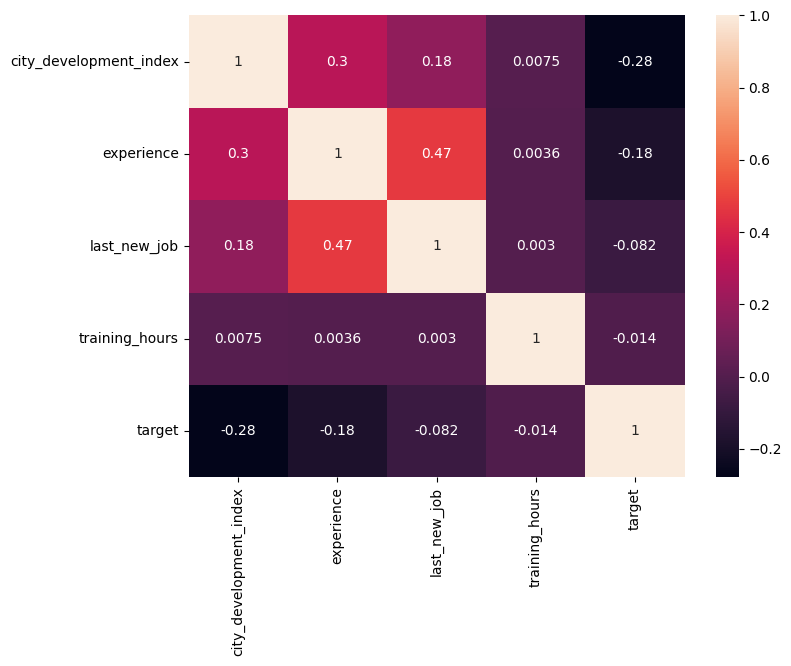

In [35]:
# Heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.drop("enrollee_id", axis=1).corr("spearman"), annot=True)
plt.xticks(rotation=90)
plt.show()

<h1><b>Conclusão:</b></h1>
<h3><b>experience em relação à:</b></h3>
<ul>
  <li> city_development_index: Pessoas que vem de cidades com alto nível de desenvolvimento tendem a ter mais experiência (embora a correlação não seja tão grande assim).
  <li> last_new_job: Se a pessoa fica pouco tempo sem trabalhar, ela adquire mais experiência (maior correlação identificada).
  <li> training_hours: Praticamente não existe correlação entre essas variáveis
  <li> target: Se a pessoa tem pouco tempo de trabalho ela busca por ter mais experiência (Correlação levemente negativa).
</ul>

<h1><b>Weight of Evidence (WOE) e Information Value (IV)</b></h1>
<p>São duas medidas usadas para analisar
a força de uma variável em relação à variável alvo. Embora possa ser usada com variáveis
numéricas e categóricas <b>normalmente</b> usamos com variáveis categóricas.</p>
<p>A fórmula para calcular o peso da evidência para qualquer característica é dada por:
<br>
<b>WOE = percentual de eventos / percentual de não eventos </b>
<br>
O peso da evidência (Weight of Evidence) indica o poder preditivo de uma única
característica em relação a sua característica independente.</p>
<p>
O valor WOE nos diz o poder preditivo de cada compartimento (classe) de um recurso. 
<p>No entanto, um único valor que representa o poder preditivo de todo o recurso será útil na seleção
de recursos. Isso é o IV (Information Value), dado pela fórmula:</p>

<p> <b>IV = sum(WOE * (percentual de eventos - percentual de não eventos)</b> </p>
<p>Interpretamos o resultado de IV assim:
Information Value, Poder de Previsão
<ul>
  <li>< 0.02: não deve ser usado para previsão
  <li>0.02 - 0.1: preditor fraco
  <li>0.1 - 0.3: preditor médio
  <li>0.3 - 0.5: preditor forte
  <li>> 0.5: parece bom demais para ser verdade
</ul></p>

In [36]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [37]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [38]:
# Loop removendo as colunas numéricas

for i in df.drop(columns = ["enrollee_id",
                            "city",
                            "city_development_index",
                            "experience",
                            "company_size",
                            "last_new_job",
                            "training_hours",
                            "target"]).columns:
  df_woe_iv = (pd.crosstab(df[i], df["target"], normalize="columns") #cruzar a relação entre df[i] e df["target"]
	     .assign(woe = lambda x: np.log(x[1] / x[0]))
	     .assign(iv = lambda x: np.sum(x["woe"] * (x[1] - x[0]))))
  print(df_woe_iv, "\n-------------------------------------------------")

target      0.0       1.0       woe        iv
gender                                       
Female  0.08098  0.096222  0.172452  0.003337
Male    0.90650  0.889020 -0.019471  0.003337
Other   0.01252  0.014758  0.164458  0.003337 
-------------------------------------------------
target                        0.0       1.0       woe        iv
relevent_experience                                            
Has relevent experience  0.753147  0.619845 -0.194790  0.083523
No relevent experience   0.246853  0.380155  0.431784  0.083523 
-------------------------------------------------
target                    0.0       1.0       woe        iv
enrolled_university                                        
Full time course     0.164754  0.307477  0.623947  0.118886
Part time course     0.063465  0.064890  0.022210  0.118886
no_enrollment        0.771781  0.627632 -0.206746  0.118886 
-------------------------------------------------
target                0.0       1.0       woe       iv
educat

In [39]:
columns_cat = df.drop(columns=[ "target",
				"enrollee_id",
				"city",
				"city_development_index",
				"training_hours",
				"experience",
				"last_new_job",
				"company_size"]).columns
# Lista para o valor IV
iv = []

for i in columns_cat:
  df_woe_iv = (pd.crosstab(df[i], df["target"], normalize="columns")
		          .assign(woe = lambda x: np.log(x[1] / x[0]))
		          .assign(iv = lambda x: np.sum(x["woe"] * (x[1]-x[0]))))
  iv.append(df_woe_iv["iv"][0])

df_iv = pd.DataFrame({"Features":columns_cat,"iv":iv}).set_index("Features").sort_values(by = "iv")

<Figure size 1000x1200 with 0 Axes>

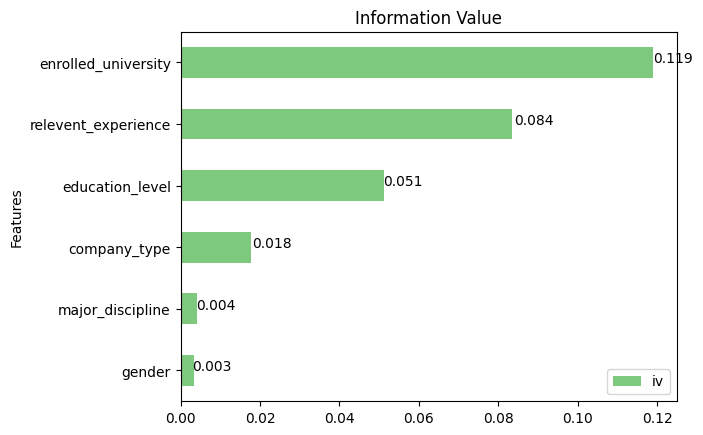

In [40]:
plt.figure(figsize=(10, 12))
df_iv.plot(kind = "barh", title = "Information Value", colormap = "Accent")
for index, value in enumerate(list(round(df_iv["iv"],3))):
	plt.text((value), index, str(value))
plt.legend(loc = "lower right")
plt.show() 

<h1><b> Verificando Valores Ausentes<b/></h1>

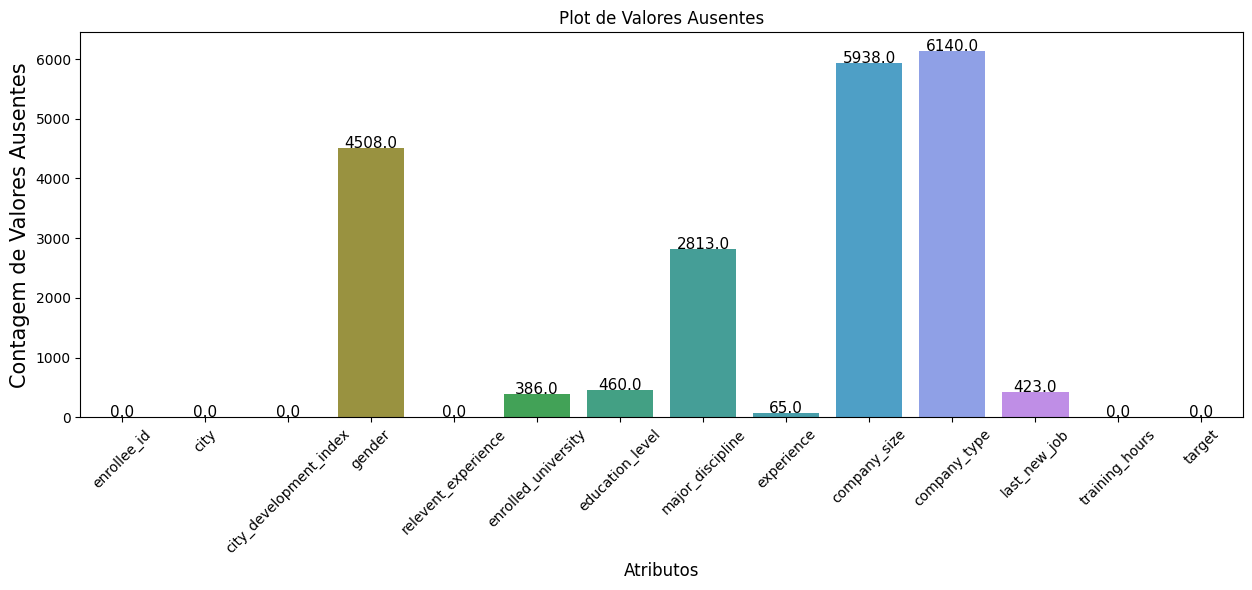

In [41]:
# Verificando a ausência de valores
df_null = df.isna().sum().reset_index()

# Figura
ax = plt.figure(figsize = (15, 5))

# Barplot
ax = sns.barplot(data=df_null, x="index", y=0, palette = "husl")
plt.xlabel("Atributos", fontsize = 12)
plt.ylabel("Contagem de Valores Ausentes", fontsize = 15)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes")

for p in ax.patches:
		ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.4, (p.get_height())),
                ha = "center", color = "black", size = 11)	

plt.show()

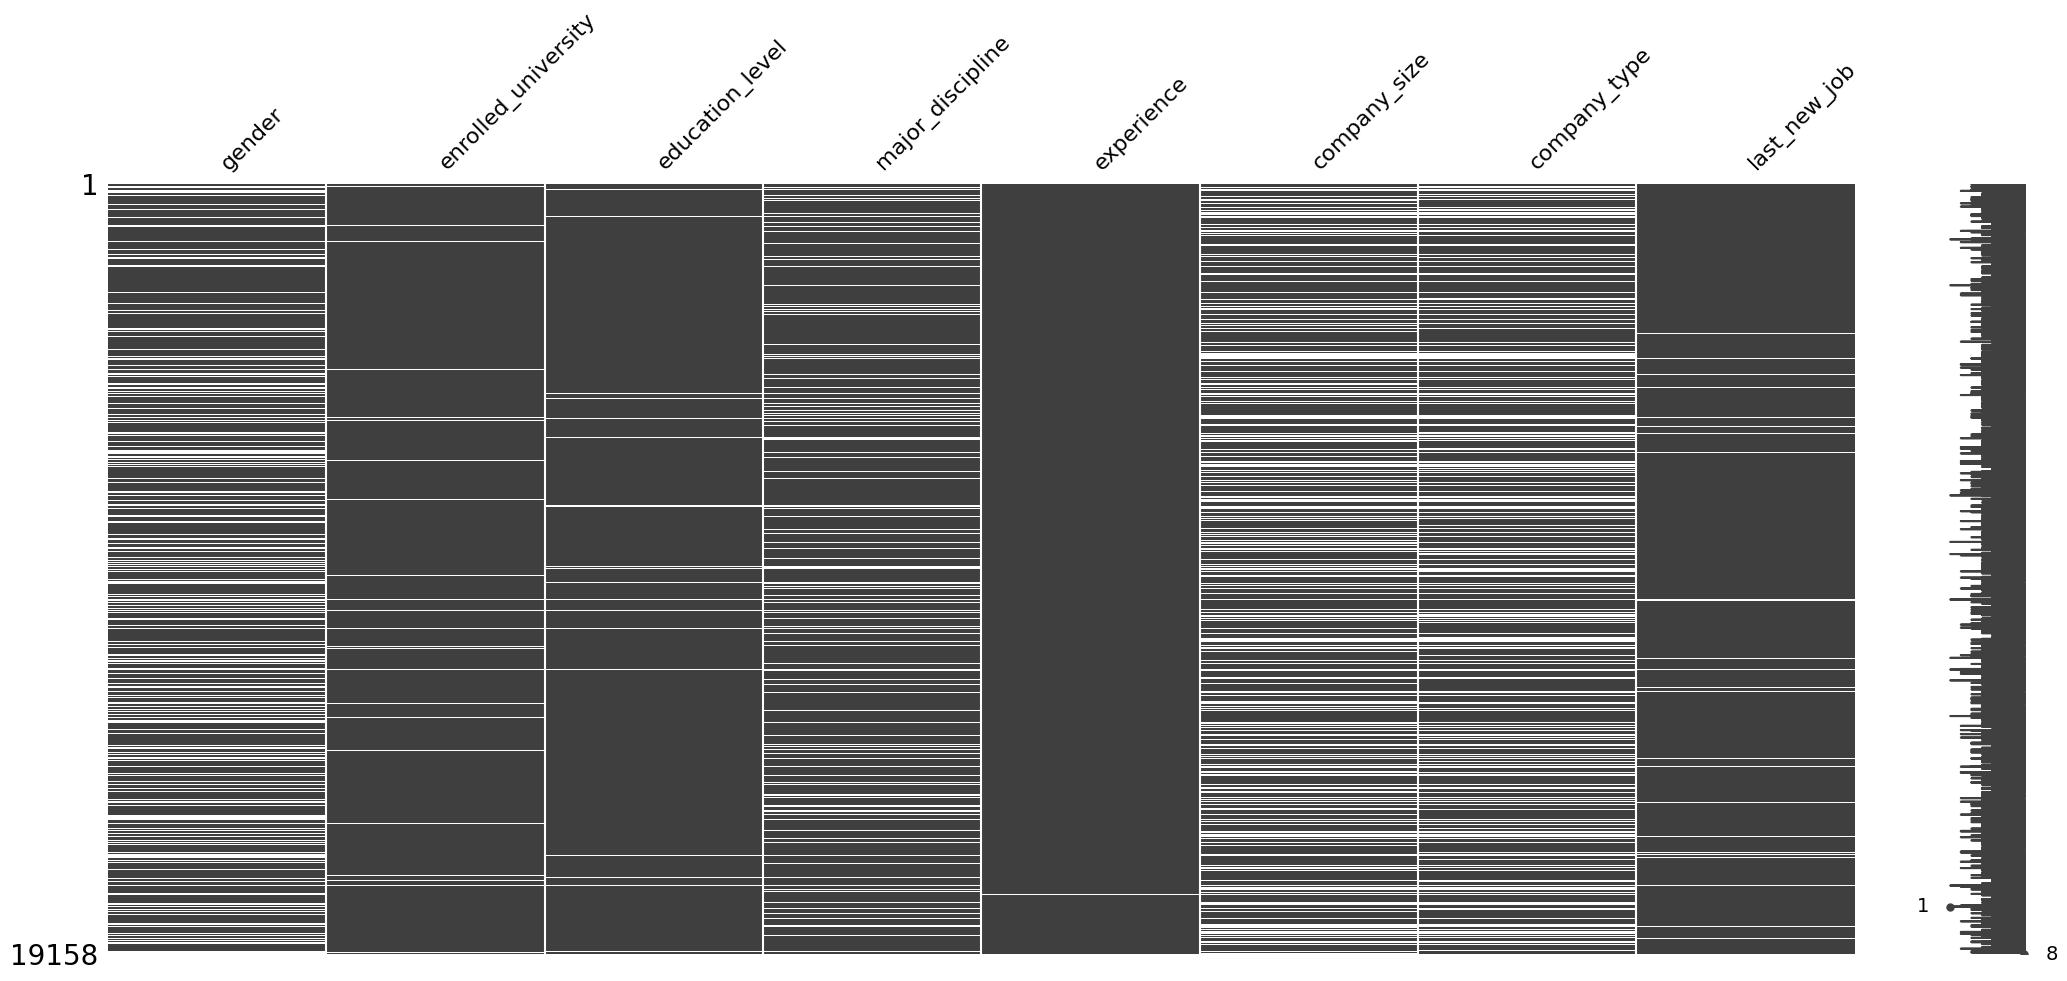

In [42]:
# Mapa de valores ausentes
df_tot_null = pd.DataFrame(df.isna().sum())

# Plotando a informação
if df.isna().any(axis = None): # Valores NaN em qualquer eixo
	missingno.matrix(df[df_tot_null[df_tot_null[0]>0].index])
	plt.show()

<h1><b>Verificando Valores Duplicados</b><h1>

In [43]:
df["enrollee_id"].duplicated().sum()

0

<h1><b>Identificando Valores Desbalanceados</b></h1>

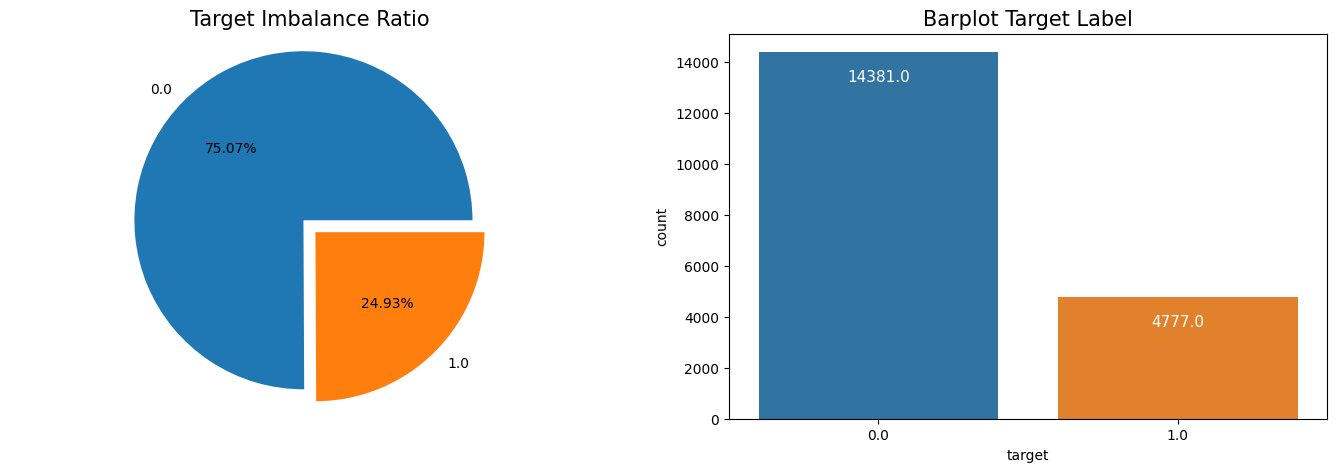

In [44]:
# Identificando se o valores estão desbalanceados
plt.figure(figsize = (17,(100) / 20))

plt.subplot(121)
plt.pie(round(df["target"].value_counts() / len(df) * 100, 2),
        labels = list(df["target"].value_counts().index),
 	autopct = "%.2f%%",
	explode = (0, 0.1))

plt.axis("equal")
plt.title("Target Imbalance Ratio", size = 15)

plt.subplot(122)
ax = sns.countplot(data = df, x = "target")
plt.title("Barplot Target Label", fontsize = 15)

for a in ax.patches:
	ax.annotate(f"\n{a.get_height()}", (a.get_x()+0.4, (a.get_height())),
                ha = "center", color = "white", size = 11, va = "top")

<h1><b>Conclusão:</b></h1>
<p>Os dados estão desbalanceados em relação à variável alvo <b>target.</b></p>
<br>

<h1><b>Limpeza e Processamento dos Dados</b></h1>
<h3>Em que momento deve ser feita a limpeza dos dados?</h3>
<ul>
  <li>Não existe uma regra que diga o momento certo de realizar a limpeza dos dados, porém se ele for feita ja no início do script é possivél que muitas informações possam se perder, portanto o ideal seria fazer a limpeza após a análise exploratória para que caso haja algum padrão ou informação relevante ja tenha sido revelada.</li>
<br>
  <li>No entanto, é importante lembrar que a limpeza dos dados deve ser realizada antes da análise estatística ou modelagem de dados, para garantir que os resultados sejam confiáveis e precisos. Realizar a limpeza após a análise exploratória pode ser arriscado, pois pode levar a conclusões errôneas se os dados não estiverem limpos e consistentes.</li>
</ul>


## **Coletando Somente as Colunas Revelantes**

In [45]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [46]:
colunas_manter = ["city_development_index",
                  "enrolled_university",
                  "experience",
                  "education_level",
                  "relevent_experience",
                  "company_type",
                  "major_discipline",
                  "target"]

In [47]:
new_df = df[colunas_manter]

In [48]:
new_df.head()

,city_development_index,enrolled_university,experience,education_level,relevent_experience,company_type,major_discipline,target
0,0.920,no_enrollment,>20,Graduate,Has relevent experience,NaN,STEM,1.0
1,0.776,no_enrollment,15,Graduate,No relevent experience,Pvt Ltd,STEM,0.0
2,0.624,Full time course,5,Graduate,No relevent experience,NaN,STEM,0.0
3,0.789,NaN,<1,Graduate,No relevent experience,Pvt Ltd,Business Degree,1.0
4,0.767,no_enrollment,>20,Masters,Has relevent experience,Funded Startup,STEM,0.0


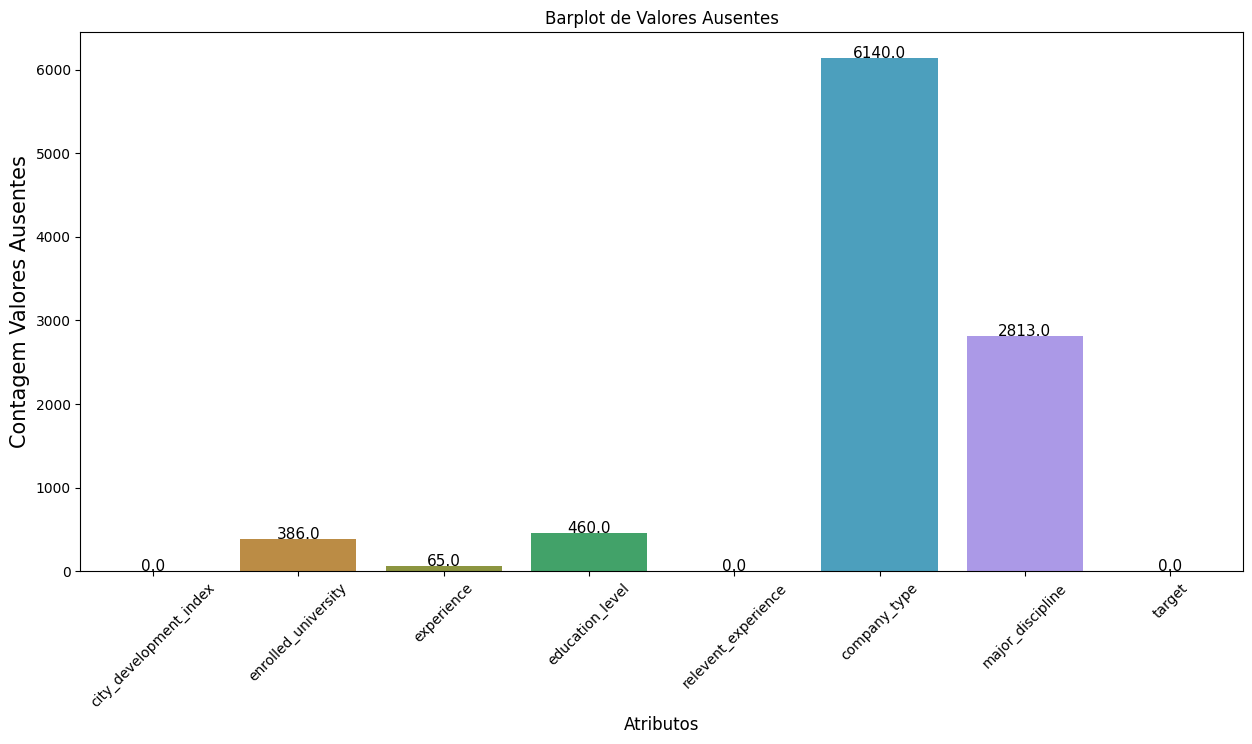

In [49]:
# Valores ausentes por coluna
null_df = new_df.isna().sum().reset_index()

# Criando a figura do gráfico
ax = plt.figure(figsize = (15, 7))

# Barplot
ax = sns.barplot(data=null_df, x="index", y=0, palette = "husl")
plt.xlabel("Atributos", fontsize = 12)
plt.ylabel("Contagem Valores Ausentes", fontsize = 15)
plt.xticks(rotation = 45)
plt.title("Barplot de Valores Ausentes")

for p in ax.patches:
  # É necessário somar +0.4 para que o valor fique exatamente no centro
  ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.4, (p.get_height())),
              ha = "center", color = "black", size = 11)
plt.show()

<h2><b>Tratando Valores Ausentes</b></h2>
<p> Antes de iniciar o processo de tratamento de valores ausentes é necessário distinguir as variáveis númericas e categóricas, pois elas tem formas diferentes de tramento no quesito valor ausente.</p>

<h3><b>major_discipline</b></h3>

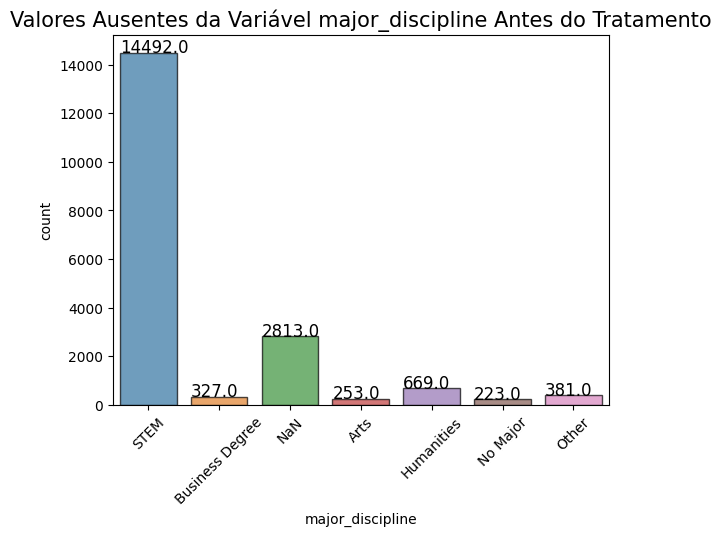

In [50]:
# Valores ausentes da viriável major_discipline antes do processamento
sns.countplot(data= new_df.fillna("NaN"), x="major_discipline", alpha=0.7, edgecolor="black")
plt.xticks(rotation= 45)
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
  ax.annotate(f"\n{p.get_height()}", (p.get_x(), (p.get_height())),
              color = "black", size = 12)
plt.title("Valores Ausentes da Variável major_discipline Antes do Tratamento", fontsize= 15)
plt.show()

In [51]:
print("\nTotal de Valores Ausentes na Variável major_discipline:", new_df["major_discipline"].isna().sum())
print("\nProporção de Valores Ausentes na Variável education_level:")
new_df[new_df["major_discipline"].isna()]["education_level"].value_counts(dropna = False)


Total de Valores Ausentes na Variável major_discipline: 2813

Proporção de Valores Ausentes na Variável education_level:


High School       2017
NaN                460
Primary School     308
Graduate            22
Masters              6
Name: education_level, dtype: int64

<p>Dentre os registros com valores ausentes, vemos a proporção na variável <b>education_level.</b></p>
<p>Preencheremos os valores NaN da variável <b>major_discipline</b> com Non Degree.</p>

In [52]:
nan_index = (new_df[(new_df["major_discipline"].isna()) & ((new_df["education_level"] == "High School") | (new_df["education_level"].isna()) | (new_df["education_level"] == "Primary School"))]).index


In [53]:
len(nan_index)

2785

In [54]:
new_df["major_discipline"][nan_index] = "Non Degree"
new_df.head()

<ipython-input-54-fa4515a2893c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["major_discipline"][nan_index] = "Non Degree"
<ipython-input-54-fa4515a2893c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["major_discipline"][nan_index] = "Non Degree"


,city_development_index,enrolled_university,experience,education_level,relevent_experience,company_type,major_discipline,target
0,0.920,no_enrollment,>20,Graduate,Has relevent experience,NaN,STEM,1.0
1,0.776,no_enrollment,15,Graduate,No relevent experience,Pvt Ltd,STEM,0.0
2,0.624,Full time course,5,Graduate,No relevent experience,NaN,STEM,0.0
3,0.789,NaN,<1,Graduate,No relevent experience,Pvt Ltd,Business Degree,1.0
4,0.767,no_enrollment,>20,Masters,Has relevent experience,Funded Startup,STEM,0.0


In [55]:
print("\nTotal de Valores Ausentes na Variável major_discipline:", new_df["major_discipline"].isna().sum())
new_df["major_discipline"].value_counts(dropna = False)


Total de Valores Ausentes na Variável major_discipline: 28


STEM               14492
Non Degree          2785
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
NaN                   28
Name: major_discipline, dtype: int64

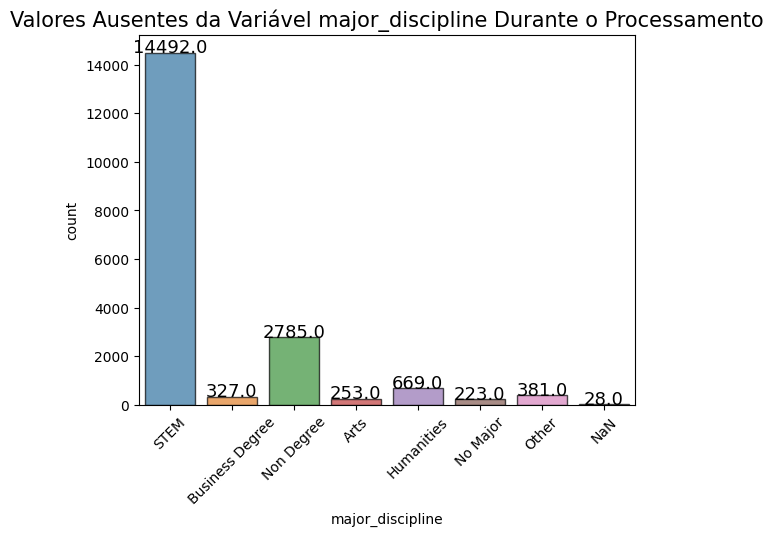

In [56]:
sns.countplot(data= new_df.fillna("NaN"), x= "major_discipline", alpha= 0.7, edgecolor= "black")
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()
for a in ax.patches:
  ax.annotate(f"\n{a.get_height()}", (a.get_x()+0.4, (a.get_height())),
              color= "black", size= 13, ha= "center")
plt.title("Valores Ausentes da Variável major_discipline Durante o Processamento", fontsize= 15)
plt.show()

<p> Ainda restaram <b>28 valores ausentes</b>, isso porque não foi informado ao criar a variável nan_index os valores de <b>graduate e master</b>, porque tem uma probabilidade dessas formações terem o <b>major</b>, mas não podemos trabalhar com suposições, então iremos substituir os 28 valores por <b>"Other"</b></p>

In [57]:
new_df[new_df["major_discipline"].isna()] = "Other"

<ipython-input-57-9d289c594251>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[new_df["major_discipline"].isna()] = "Other"


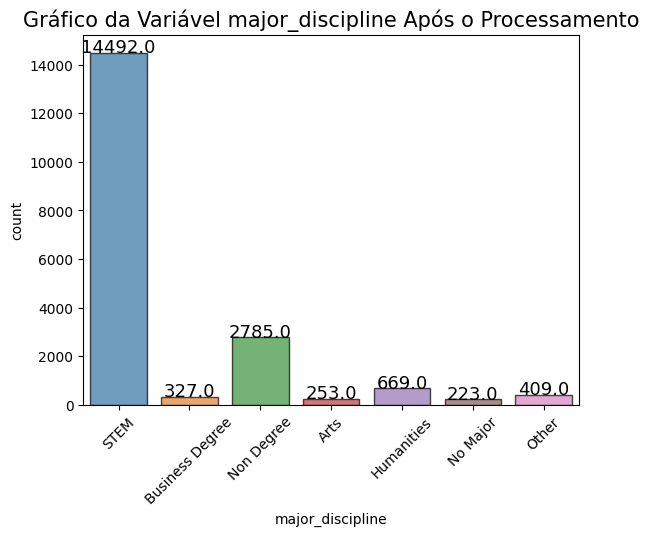

In [58]:
sns.countplot(data= new_df.fillna("NaN"), x= "major_discipline", alpha= 0.7, edgecolor= "black")
plt.xticks(rotation = 45)
# bound = ax.get_xbound()
ax = plt.gca()

for p in ax.patches:
  ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.4, (p.get_height())),
              color= "black", size= 13, ha= "center")
plt.title("Gráfico da Variável major_discipline Após o Processamento", fontsize= 15)
plt.show()

<h3><b>enrolled_university</b></h3>

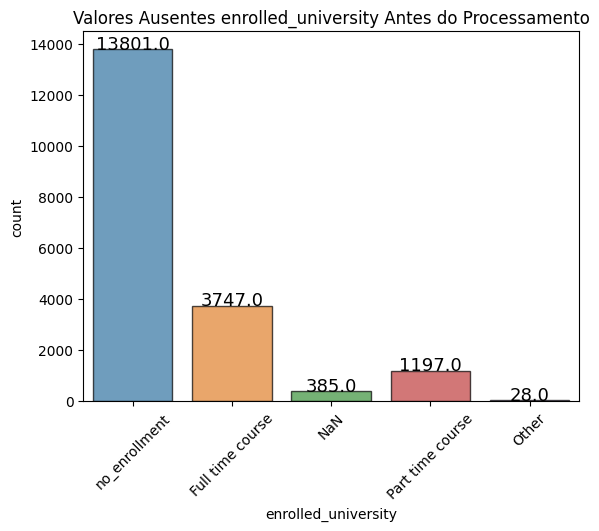

In [59]:
sns.countplot(data= new_df.fillna("NaN"), x= "enrolled_university", alpha= 0.7, edgecolor= "black")
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()

for p in ax.patches:
  ax.annotate(f"\n{p.get_height()}", (p.get_x()+ 0.4, (p.get_height())),
              color= "black", size= 13, ha= "center")
plt.title("Valores Ausentes enrolled_university Antes do Processamento")
plt.show()

In [60]:
print("Quantidade de valores ausentes na coluna 'enrolled_university':", df["enrolled_university"].isna().sum())
print("Proporção de valores ausentes na variável 'education_level'")
new_df[new_df["enrolled_university"].isna()] ["education_level"].value_counts(dropna= False)

Quantidade de valores ausentes na coluna 'enrolled_university': 386
Proporção de valores ausentes na variável 'education_level'


Graduate          170
NaN               100
Masters            53
High School        47
Primary School      9
Phd                 6
Name: education_level, dtype: int64

<p> Candidato com <b>Primary School</b> em <i>education_level</i> não estão qualificados para ingressar na universidade. Portanto preencheremos os valores NaN em <b>education_level</b> por <b>Primary_Grad</b>.

In [61]:
nan_index = (new_df[(new_df["enrolled_university"].isna()) & (new_df["education_level"] == "Primary School")]).index

In [62]:
len(nan_index)

9

In [63]:
new_df["enrolled_university"][nan_index] = "Primary_Grad"

<ipython-input-63-f103277bc6e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["enrolled_university"][nan_index] = "Primary_Grad"


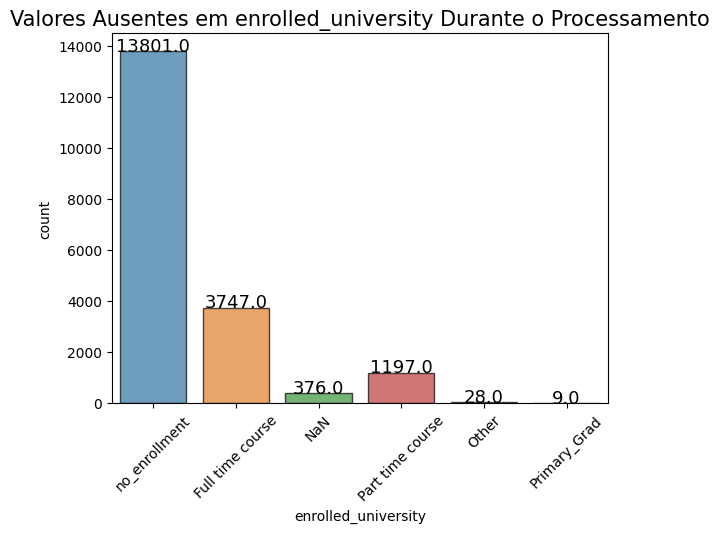

In [64]:
sns.countplot(data= new_df.fillna("NaN"), x= "enrolled_university", alpha= 0.7, edgecolor= "black")
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()

for y in ax.patches:
  ax.annotate(f"\n{y.get_height()}", (y.get_x()+0.4, (y.get_height())),
              color= "black", size= 13, ha= "center")
plt.title("Valores Ausentes em enrolled_university Durante o Processamento", fontsize= 15)
plt.show()


In [65]:
print("Total de Valores Ausentes:", new_df["enrolled_university"].isna().sum())
new_df[new_df["enrolled_university"].isna()]["education_level"].value_counts(dropna = False)

Total de Valores Ausentes: 376


Graduate       170
NaN            100
Masters         53
High School     47
Phd              6
Name: education_level, dtype: int64

In [66]:
nan_index = new_df[(new_df["enrolled_university"].isna())].index

In [67]:
new_df["enrolled_university"][nan_index] = "Other"

<ipython-input-67-c765a7be0934>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["enrolled_university"][nan_index] = "Other"


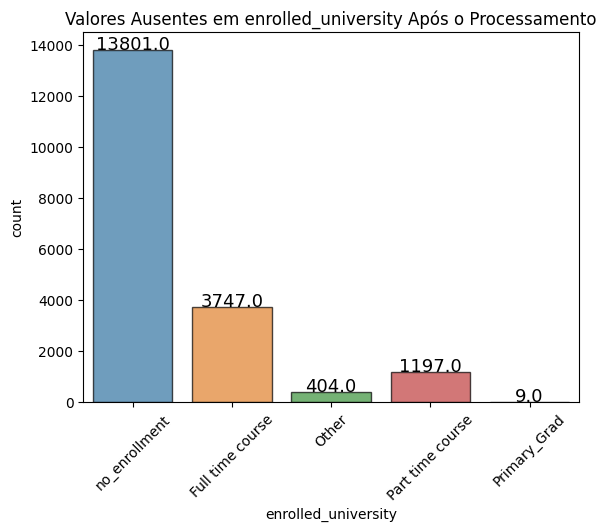

In [68]:
sns.countplot(data= new_df.fillna("NaN"), x= "enrolled_university", alpha= 0.7, edgecolor= "black")
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()

for a in ax.patches:
  ax.annotate(f"{a.get_height()}", (a.get_x()+0.4, (a.get_height())),
              color= "black", size= 13, ha= "center")

plt.title("Valores Ausentes em enrolled_university Após o Processamento")
plt.show()

In [69]:
new_df.head()

,city_development_index,enrolled_university,experience,education_level,relevent_experience,company_type,major_discipline,target
0,0.92,no_enrollment,>20,Graduate,Has relevent experience,NaN,STEM,1.0
1,0.776,no_enrollment,15,Graduate,No relevent experience,Pvt Ltd,STEM,0.0
2,0.624,Full time course,5,Graduate,No relevent experience,NaN,STEM,0.0
3,0.789,Other,<1,Graduate,No relevent experience,Pvt Ltd,Business Degree,1.0
4,0.767,no_enrollment,>20,Masters,Has relevent experience,Funded Startup,STEM,0.0


<h3><b>Variável company_type</b></h3>

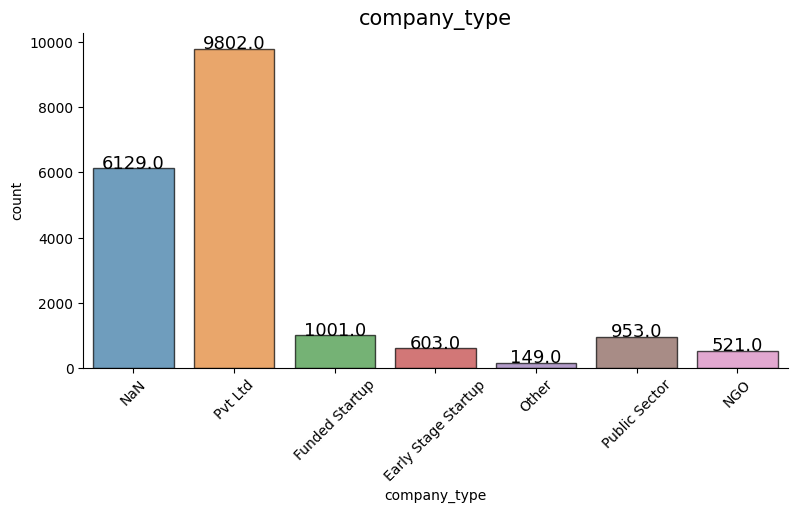

In [70]:
plt.figure(figsize= (20, 20))
column_list = ["company_type"]
A = 0
for i in column_list:
	A+=1
	plt.subplot(4, 2, A)
	ax = sns.countplot(data = new_df.fillna("NaN"), x = i, alpha= 0.7, edgecolor= "black")
	sns.despine()
	plt.title(i, fontsize= 15)
	for p in ax.patches:
		ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.4, (p.get_height())),
		            color= "black", size= 13, ha= "center")
	if A >= 0:
		plt.xticks(rotation = 45)

<p> Como podemos observar o valor NaN é o segundo maior na coluna <b>company_type</b>, como não temos informações não é possivel verificar relação com outros dados, neste caso vamos usar uma abordagem mais genérica e substituir os valores NaN por <b>Other</b></p>

In [71]:
new_df["company_type"].value_counts(dropna = False)

Pvt Ltd                9802
NaN                    6129
Funded Startup         1001
Public Sector           953
Early Stage Startup     603
NGO                     521
Other                   149
Name: company_type, dtype: int64

In [72]:
nan_index = new_df[(new_df["company_type"].isna())].index

In [73]:
new_df["company_type"][nan_index] = "Other"

<ipython-input-73-37b557d7f5a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["company_type"][nan_index] = "Other"


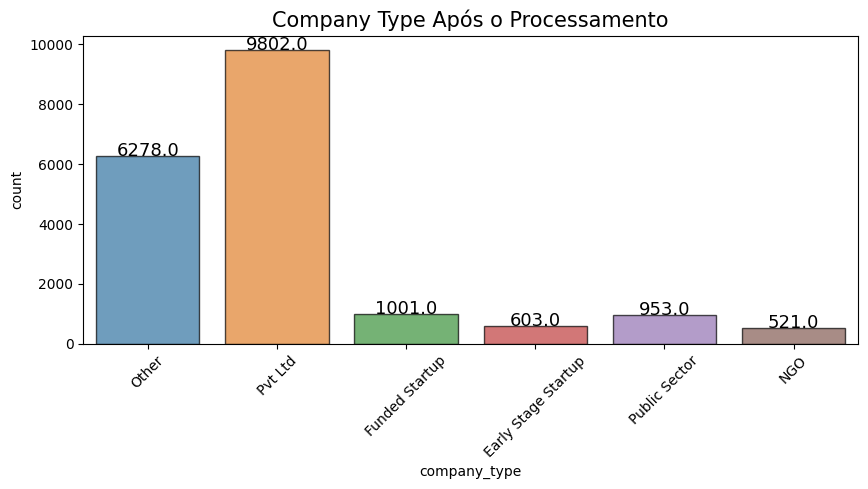

In [74]:
plt.figure(figsize=(10, 4))
sns.countplot(data= new_df.fillna("NaN"), x= "company_type", alpha= 0.7, edgecolor="black")
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()

for i in ax.patches:
  ax.annotate(f"{i.get_height()}", (i.get_x()+0.4, (i.get_height())),
              color= "black", size= 13, ha= "center")
  
plt.title("Company Type Após o Processamento", fontsize= 15)
plt.show()

<h3><b>Variável education_level</b></h3>

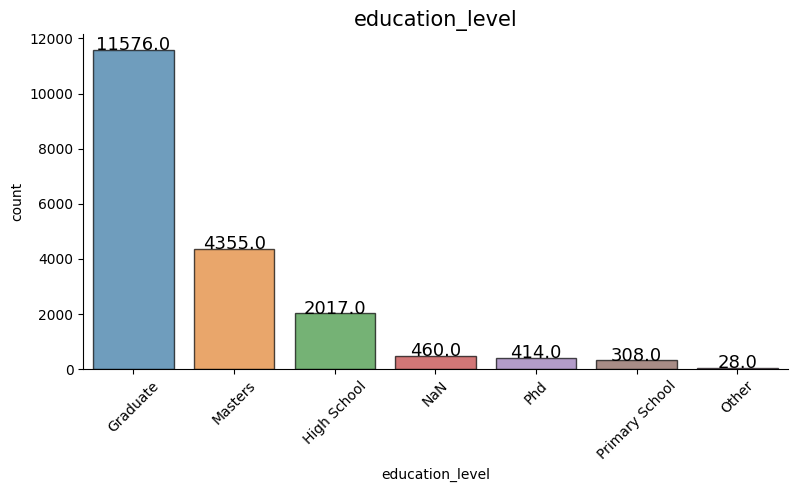

In [75]:
plt.figure(figsize=(20, 20))
column = ["education_level"]
A = 0
for i in column:
  A += 1
  plt.subplot(4, 2, A)
  ax = sns.countplot(data = new_df.fillna("NaN"), x = i, alpha= 0.7, edgecolor="black")
  sns.despine()
  plt.title(i, fontsize=15)
  for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x()+0.4, (p.get_height())),
                color= "black", size= 13, ha= "center")
    if A >= 0:
      plt.xticks(rotation = 45)

In [76]:
nan_index = new_df[(new_df["education_level"].isna())].index

In [77]:
new_df["education_level"][nan_index] = "Other"

<ipython-input-77-44eee985b606>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["education_level"][nan_index] = "Other"


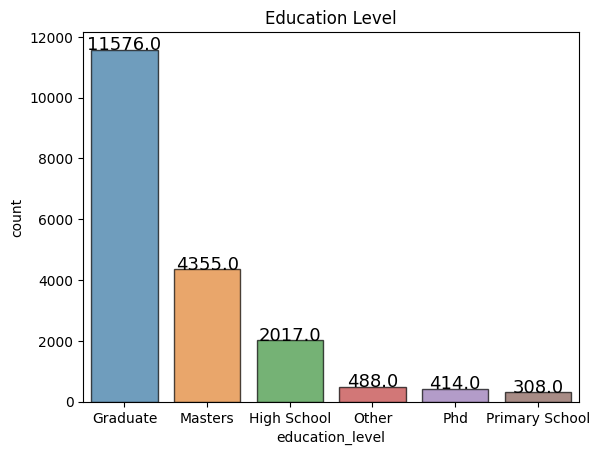

In [78]:
sns.countplot(data= new_df.fillna("NaN"), x= "education_level", alpha= 0.7, edgecolor= "black")
bound = ax.get_xbound()
ax = plt.gca()

for i in ax.patches:
  ax.annotate(f"\n{i.get_height()}", (i.get_x()+0.4, (i.get_height())),
              color= "black", size= 13, ha= "center")
plt.title("Education Level")
plt.show()

<h3><b>Variável experience</h3></b>
<p> Essa é a única variável numérica que temos no nosso dataframe, portanto a abordagem será um pouco diferente, lembrando que como este dataframe foi uma cópia do original, a variável experience retornou ao estado de object.</p>




In [79]:
new_df["experience"].value_counts(dropna= False)

>20      3281
5        1427
4        1402
3        1351
6        1214
2        1124
7        1028
10        982
9         980
8         802
15        685
11        664
14        586
1         549
<1        520
16        506
12        494
13        399
17        342
19        304
18        279
20        148
NaN        63
Other      28
Name: experience, dtype: int64

In [81]:
missing_values = new_df.isna().sum() / len(new_df) * 100
missing_values

city_development_index    0.000000
enrolled_university       0.000000
experience                0.328844
education_level           0.000000
relevent_experience       0.000000
company_type              0.000000
major_discipline          0.000000
target                    0.000000
dtype: float64

<p> Temos <b>0.32%</b> oque indica <b>menos de meio por cento</b>, ou seja, não temos uma quantidade relevante de dados faltando, neste caso podemos simplesmente remove-los pois não afetarão em <b>nada</b> na nossa análise.</p>

In [83]:
new_df["experience"].isna().sum()

63

In [84]:
new_df.shape

(19158, 8)

In [85]:
new_df = new_df.dropna()

In [86]:
new_df.shape

(19095, 8)

In [89]:
missing_values = new_df.isna().sum() / len(new_df) * 100
missing_values

city_development_index    0.0
enrolled_university       0.0
experience                0.0
education_level           0.0
relevent_experience       0.0
company_type              0.0
major_discipline          0.0
target                    0.0
dtype: float64

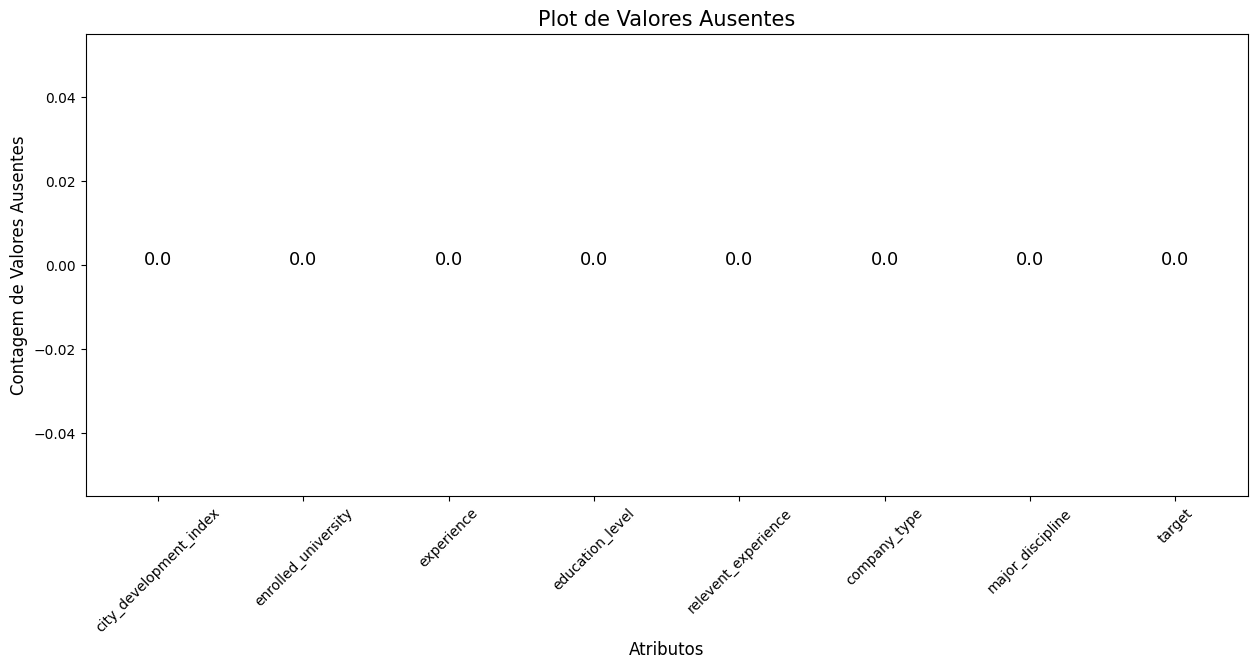

In [113]:
# Criando variável para atribuir valores ausentes
null_df = new_df.isna().sum().reset_index()

# Figura
ax = plt.figure(figsize=(15,6))

# Gráfico
ax = sns.barplot(x="index", y=0, data=null_df, palette="husl")
plt.xlabel("Atributos", fontsize=12)
plt.ylabel("Contagem de Valores Ausentes", fontsize=12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize=15)

# Rótulo de dados
for p in ax.patches:
	ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.4, (p.get_height())), color="black", size=13, ha="center")

In [114]:
new_df.head()

,city_development_index,enrolled_university,experience,education_level,relevent_experience,company_type,major_discipline,target
0,0.92,no_enrollment,>20,Graduate,Has relevent experience,Other,STEM,1.0
1,0.776,no_enrollment,15,Graduate,No relevent experience,Pvt Ltd,STEM,0.0
2,0.624,Full time course,5,Graduate,No relevent experience,Other,STEM,0.0
3,0.789,Other,<1,Graduate,No relevent experience,Pvt Ltd,Business Degree,1.0
4,0.767,no_enrollment,>20,Masters,Has relevent experience,Funded Startup,STEM,0.0


In [115]:
new_df["enrolled_university"] = new_df["enrolled_university"].apply(lambda x: x.title())

In [116]:
new_df.head()

,city_development_index,enrolled_university,experience,education_level,relevent_experience,company_type,major_discipline,target
0,0.92,No_Enrollment,>20,Graduate,Has relevent experience,Other,STEM,1.0
1,0.776,No_Enrollment,15,Graduate,No relevent experience,Pvt Ltd,STEM,0.0
2,0.624,Full Time Course,5,Graduate,No relevent experience,Other,STEM,0.0
3,0.789,Other,<1,Graduate,No relevent experience,Pvt Ltd,Business Degree,1.0
4,0.767,No_Enrollment,>20,Masters,Has relevent experience,Funded Startup,STEM,0.0


In [117]:
x = new_df.drop(columns=["target"])
y = new_df["target"]

<h2><b>Relatório Final</b></h2>
Com base em nossa análise observamos que as variáveis mais relevantes para identificar um bom candidato são:

- Índice de Desenvolvimento da cidade onde mora o candidato.
- Tempo de experiência profissional.
- Se está ou não matriculado em um curso universitário.
- Se tem ou não experiência relevante.
- O nível educacional.
- O tipo de empresa que o candidato trabalhou ou trabalha atualmente.
- A especialização na graduação (quando for o caso).

Não são relevantes para a análise:

- O ID do candidato.
- O código da cidade do candidato.
- O gênero.
- A última vez que o candidato esteve empregado.
- O tamanho da empresa (quando for o caso).
- Total de horas de treimamento.


**Recomendações do Analista de Dados**:

- O RH pode desenvolver um método de coleta de dados para obter outros recursos a fim de melhorar a qualidade dos dados e tornar o trabalho de análise mais preciso.

- O RH pode procurar candidatos que vêm de cidades com índice de desenvolvimento urbano mais baixo, sem experiência relevante, nível de educação superior e menor experiência de trabalho para ter maior chance de encontrar candidatos que estão procurando um emprego.

- O RH pode tornar o treinamento mais compacto porque muitas pessoas não precisam de muito tempo para concluir o treinamento.

<h1><b>Fim</b><h1>